<a href="https://colab.research.google.com/github/marknunes/limpeza_dados/blob/main/limpeza_tratamento_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Bibliotas
import pandas as pd
import seaborn as snr
import statistics as sts

In [3]:
# Importando dados
from google.colab import files
uploaded = files.upload()

Saving Churn.csv to Churn.csv


In [4]:
# Associando os dados a variavel
dataset = pd.read_csv('Churn.csv', sep=';')
dataset.head()


,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [5]:
# tamanho
linhas, colunas = dataset.shape
print(f'O dataset tem {linhas} linhas e {colunas} colunas')

O dataset tem 999 linhas e 12 colunas


In [6]:
# Renomeando
dataset.columns = ['id', 'score', 'estado', 'genero', 'idade', 'patrimonio', 'saldo', 'produtos', 'temcartcredito', 'ativo', 'salario', 'saida']
dataset.head()

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temcartcredito,ativo,salario,saida
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [7]:
#visualizando
dataset.head()

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temcartcredito,ativo,salario,saida
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [8]:
# Explorando dados categoricos
# Estado
agrupado = dataset.groupby(['estado']).size()
agrupado

,0
estado,
PR,257
RP,1
RS,478
SC,258
SP,4
TD,1


<Axes: xlabel='estado'>

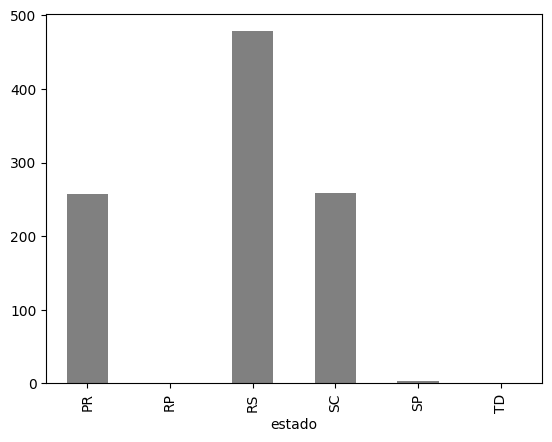

In [9]:
agrupado.plot.bar(color='grey')

In [10]:
# Genero
agrupado = dataset.groupby(['genero']).size()
agrupado

,0
genero,
F,2
Fem,1
Feminino,461
M,6
Masculino,521


<Axes: xlabel='genero'>

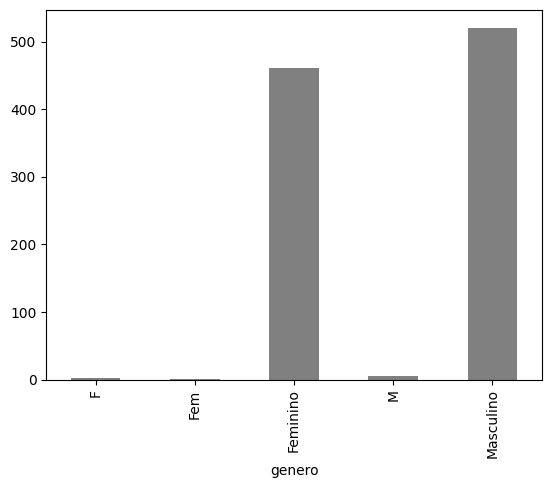

In [11]:
agrupado.plot.bar(color='grey')

In [12]:
# Explorando colunas numericas
# Score
dataset['score'].describe()

,score
count,999.000000
mean,648.621622
std,98.264219
min,376.000000
25%,580.000000
50%,653.000000
75%,721.000000
max,850.000000


Text(0.5, 1.0, 'Score')

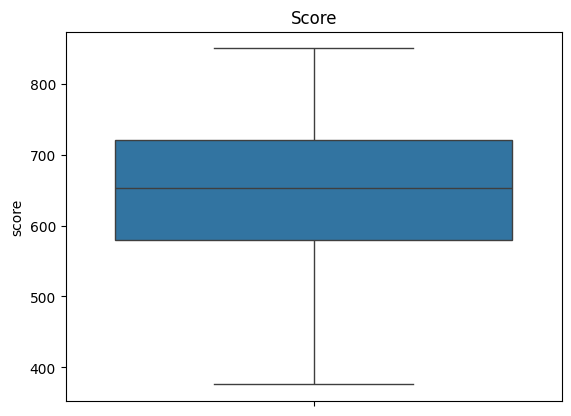

In [13]:
snr.boxplot(dataset['score']).set_title('Score')

Text(0.5, 1.0, 'Score')

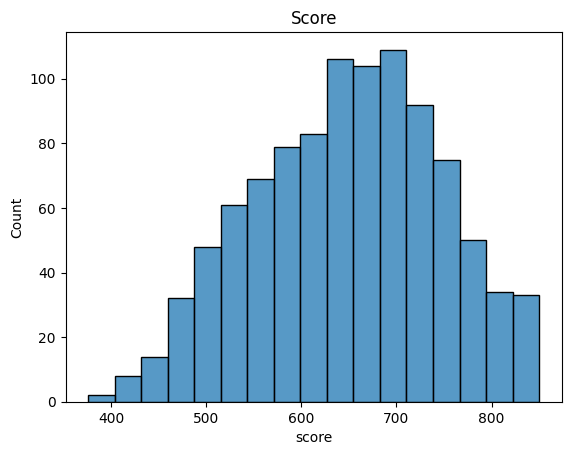

In [14]:
snr.histplot(dataset['score']).set_title('Score')

In [15]:
dataset['idade'].describe()


,idade
count,999.000000
mean,38.902903
std,11.401912
min,-20.000000
25%,32.000000
50%,37.000000
75%,44.000000
max,140.000000


Text(0.5, 1.0, 'idade')

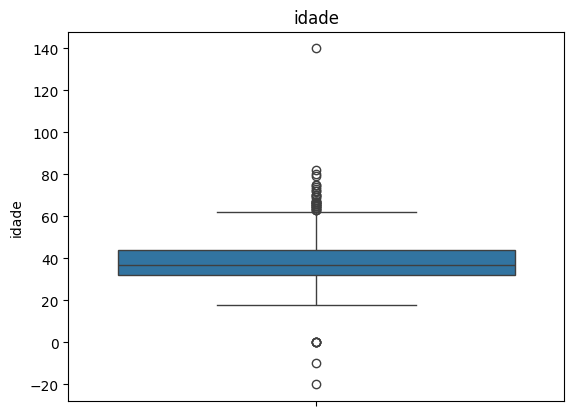

In [16]:
snr.boxplot(dataset['idade']).set_title('idade')

Text(0.5, 1.0, 'Idade')

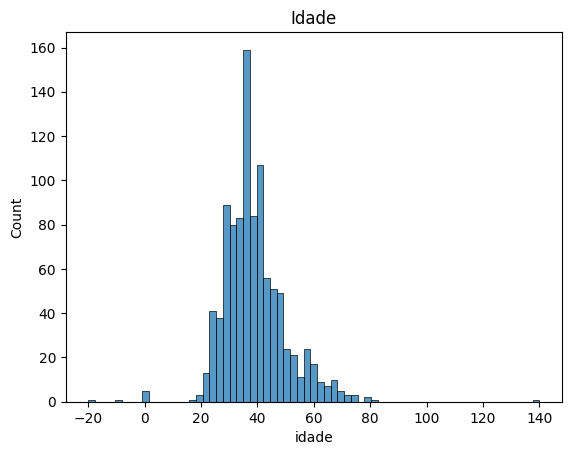

In [17]:
snr.histplot(dataset['idade']).set_title('Idade')

In [18]:
# Saldo
dataset['saldo'].describe()

,saldo
count,9.990000e+02
mean,7.164928e+06
std,6.311840e+06
min,0.000000e+00
25%,0.000000e+00
50%,8.958835e+06
75%,1.258684e+07
max,2.117743e+07


Text(0.5, 1.0, 'saldo')

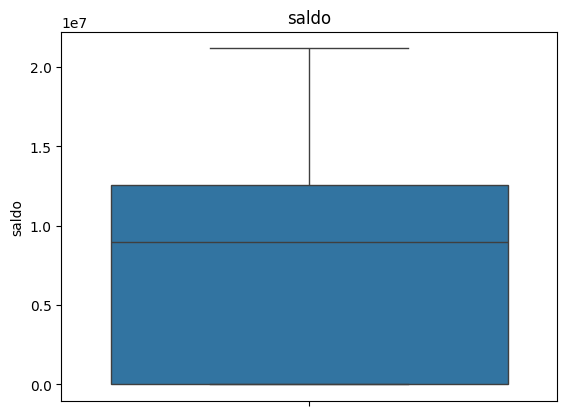

In [19]:
snr.boxplot(dataset['saldo']).set_title('saldo')

Text(0.5, 1.0, 'saldo')

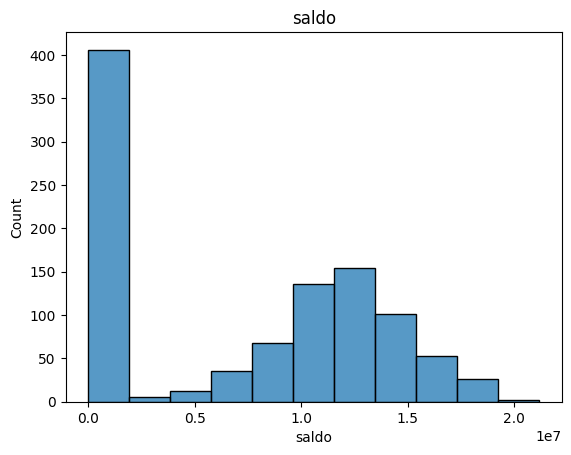

In [20]:
snr.histplot(dataset['saldo']).set_title('saldo')

In [21]:
# Contando valores nan
# Genero e salario
dataset.isnull().sum()

,0
id,0
score,0
estado,0
genero,8
idade,0
patrimonio,0
saldo,0
produtos,0
temcartcredito,0
ativo,0


In [22]:
dataset['salario'].describe()

,salario
count,9.920000e+02
mean,3.528762e+07
std,5.305800e+08
min,9.677000e+03
25%,3.029011e+06
50%,8.703250e+06
75%,1.405213e+07
max,1.193469e+10


In [23]:
mediana= sts.median(dataset['salario'])
mediana

70518.0

In [24]:
# substituindo NAN por mediana
dataset['salario'].fillna(mediana, inplace=True)

<ipython-input-24-8cd68dbf0b6b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['salario'].fillna(mediana, inplace=True)


In [25]:
# Verificando se ainda existem valores NAN
dataset['salario'].isnull().sum()

np.int64(0)

In [26]:
# Genero, falta de padronização e NAs
agrupado = dataset.groupby(['genero']).size()
agrupado

,0
genero,
F,2
Fem,1
Feminino,461
M,6
Masculino,521


In [27]:
#total de NAs
dataset['genero'].isnull().sum()

np.int64(8)

In [28]:
# preenchendo NAs com masculino(moda)
dataset['genero'].fillna('Masculino', inplace=True)

<ipython-input-28-dca222dc03fa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['genero'].fillna('Masculino', inplace=True)


In [29]:
# Verificando Nas novamente
dataset['genero'].isnull().sum()


np.int64(0)

In [30]:
# Padronizanndo os dados
dataset.loc[dataset['genero'] ==  'M', 'genero'] = "Masculino"
dataset.loc[dataset['genero'].isin( ['Fem','F']), 'genero'] = "Feminino"
#visualiza o resultado
agrupado = dataset.groupby(['genero']).size()
agrupado

,0
genero,
Feminino,464
Masculino,535


In [31]:
# Idades fora do dominio
dataset['idade'].describe()

,idade
count,999.000000
mean,38.902903
std,11.401912
min,-20.000000
25%,32.000000
50%,37.000000
75%,44.000000
max,140.000000


In [32]:
# visualizando idades foram do padrão
dataset.loc[(dataset['idade'] <  0 )  | ( dataset['idade'] >  120) ]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temcartcredito,ativo,salario,saida
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [33]:
# Calcular mediana
mediana = sts.median(dataset['idade'])
mediana

37

In [34]:
# substituindo valores fora do padrão pela mediana
dataset.loc[(dataset['idade'] < 0 ) | (  dataset['idade'] > 120), 'idade'] = mediana

In [36]:
# Verificando se ainda existem idades fora do padrão
dataset.loc[(dataset['idade'] <  0 )  | ( dataset['idade'] >  120) ]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temcartcredito,ativo,salario,saida


In [37]:
# Dados Duplicados, buscamos por id
dataset[dataset.duplicated(['id'], keep=False)]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temcartcredito,ativo,salario,saida
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [38]:
# Excluindo duplicata pelo id
dataset.drop_duplicates(subset='id', keep='first', inplace=True)
# Buscando duplicata
dataset[dataset.duplicated(['id'], keep=False)]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temcartcredito,ativo,salario,saida


In [39]:
# Estados fora do dominio
agrupado = dataset.groupby(['estado']).size()
agrupado

,0
estado,
PR,257
RP,1
RS,477
SC,258
SP,4
TD,1


In [40]:
# atribuindo estado fora do dominio para RS(moda)
dataset.loc[dataset['estado'].isin(['RP', 'SP', 'TD']), 'estado'] = 'RS'
agrupado = dataset.groupby(['estado']).size()
agrupado

,0
estado,
PR,257
RS,483
SC,258


In [41]:
# outliers em salario, considerando dois devios padrão
desv = sts.stdev(dataset['salario'])
desv

528988918.4679201

In [42]:
#definir padrão como maior que 2 desvios padrão
#checamos se algum atende critério
dataset.loc[dataset['salario'] >=  2 * desv ]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temcartcredito,ativo,salario,saida
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [43]:
# Mediana dos salarios
mediana = sts.median(dataset['salario'])
mediana


8637195.5

In [44]:
# Atribuindo a mediana para outliers
dataset.loc[dataset['salario'] >= 2 * desv, 'salario'] = mediana
# checando se algum atende ao criterio
dataset.loc[dataset['salario'] >=  2 * desv ]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temcartcredito,ativo,salario,saida


In [45]:
dataset.head()

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temcartcredito,ativo,salario,saida
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [46]:
dataset.shape

(998, 12)

In [47]:
# Baixando o novo arquivo já tratado
dataset.to_csv('Churn_tratado.csv', sep=';', index=False)
from google.colab import files
files.download('Churn_tratado.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>